<a href="https://colab.research.google.com/github/denniss83/Perakende_Musteri_Analizi_ve_Segmentasyonu_2023_2024/blob/main/Perakende_M%C3%BC%C5%9Fteri_Analizi_ve_Segmentasyonu_(2023%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perakende Müşteri Analizi ve Segmentasyonu (2023–2024)

>⚠️ **Uyarı:**
>**Bu çalışma yalnızca python ile veri analizi öğrenimi kapsamında eğitim amacıyla yapılmıştır. Gerçek bir kurumsal analizi temsil etmemektedir ve ticari kararlar için doğrudan kullanılmamalıdır.**

Bu projede, perakende satışlara ilişkin geniş kapsamlı bir müşteri veri seti analiz edilmiştir.
Çalışmada müşteri demografisi, alışveriş sıklığı, toplam harcama, memnuniyet düzeyi ve sipariş durumu gibi çeşitli değişkenler incelenmiş; grafik destekli analizlerle müşteri profili ve davranışları ortaya konmuştur.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use("ggplot")

%matplotlib inline

# Veri Yükleme

Google Colab ortamına `retail_data.csv` adlı veri dosyası yüklenmiştir. Bu veri seti, Kaggle platformu üzerinden elde edilmiştir.

> 📁 Veri Kaynağı:  
> https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset


In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_data.csv to retail_data.csv


In [3]:
df = pd.read_csv("retail_data.csv")
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


###Veri Yapısı

In [4]:
df.info()
print("\nSatır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

### Eksik Değer Kontrolü

In [5]:
df.isnull().sum().sort_values(ascending=False)

,0
Name,382
Phone,362
Total_Purchases,361
Date,359
Amount,357
Year,350
Time,350
Total_Amount,350
Email,347
Zipcode,340


### Özet İstatistikler

In [6]:
df.describe().T
df.describe(include='object').T

,count,unique,top,freq
Name,301628,159390,Michael Smith,144
Email,301663,52897,Michael59@gmail.com,93
Address,301695,299329,34070 Angela Islands,2
City,301762,130,Chicago,21652
State,301729,54,England,63059
Country,301739,5,USA,95223
Gender,301693,2,Male,187599
Income,301720,3,Medium,130230
Customer_Segment,301795,3,Regular,146221
Date,301651,366,11/22/2023,910


### Benzersiz Değer Sayısı

In [7]:
df.nunique().sort_values(ascending=False)

,0
Address,299329
Total_Amount,299305
Amount,299297
Phone,299295
Transaction_ID,294461
Name,159390
Zipcode,93978
Customer_ID,86766
Time,83677
Email,52897


### Veri Temizliği

In [8]:
df_clean = df.dropna()
df_clean["Year"] = df_clean["Year"].astype(int)
df_clean["Month"] = df_clean["Month"].astype("category")
df_clean["Gender"] = df_clean["Gender"].astype("category")
df_clean["Income"] = df_clean["Income"].astype("category")
df_clean["Customer_Segment"] = df_clean["Customer_Segment"].astype("category")

# Demografik Analiz ve Görselleştirme

Bu bölümde müşterilerin demografik özellikleri incelenmiş ve grafiklerle görselleştirilmiştir. Özellikle cinsiyet, gelir seviyesi ve segment dağılımları detaylandırılmıştır.

## Cinsiyete Göre Müşteri Dağılımı

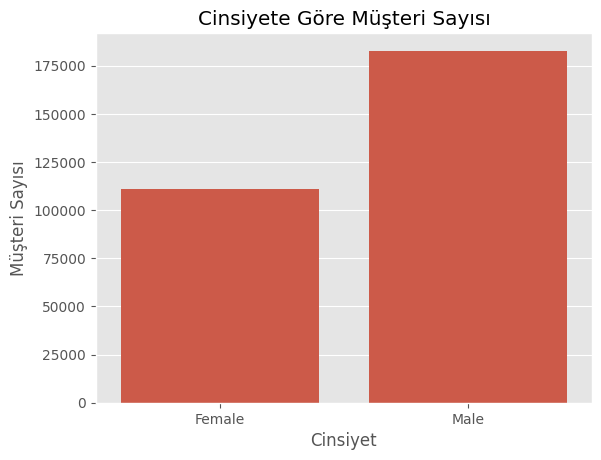

In [9]:
sns.countplot(data=df_clean, x="Gender")
plt.title("Cinsiyete Göre Müşteri Sayısı")
plt.xlabel("Cinsiyet")
plt.ylabel("Müşteri Sayısı")
plt.show()

## Gelir Seviyesine Göre Dağılım

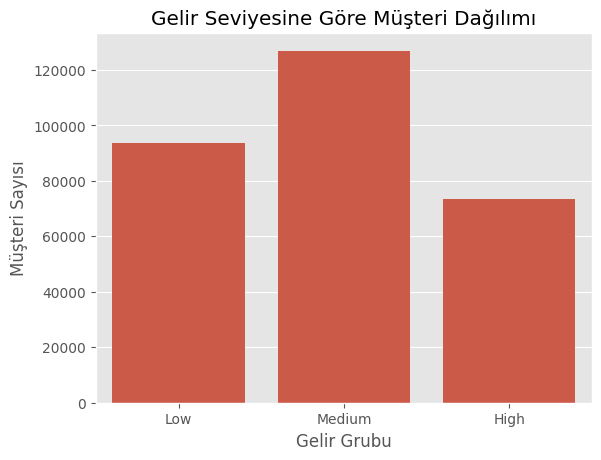

In [10]:
sns.countplot(data=df_clean, x="Income", order=["Low", "Medium", "High"])
plt.title("Gelir Seviyesine Göre Müşteri Dağılımı")
plt.xlabel("Gelir Grubu")
plt.ylabel("Müşteri Sayısı")
plt.show()

## Müşteri Segmentine Göre Dağılım

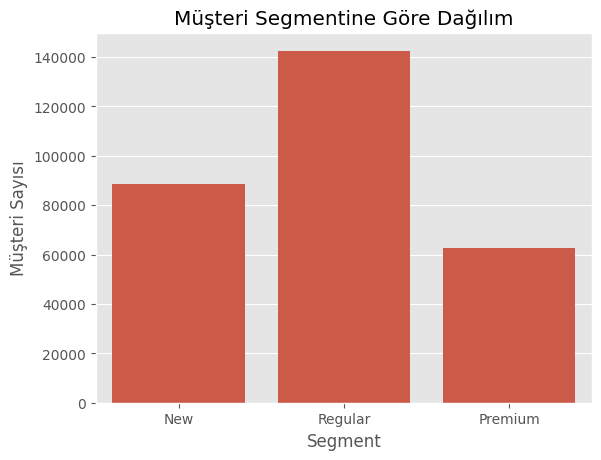

In [11]:
sns.countplot(data=df_clean, x="Customer_Segment", order=["New", "Regular", "Premium"])
plt.title("Müşteri Segmentine Göre Dağılım")
plt.xlabel("Segment")
plt.ylabel("Müşteri Sayısı")
plt.show()

## Gelir Grubu ve Cinsiyet İlişkisi

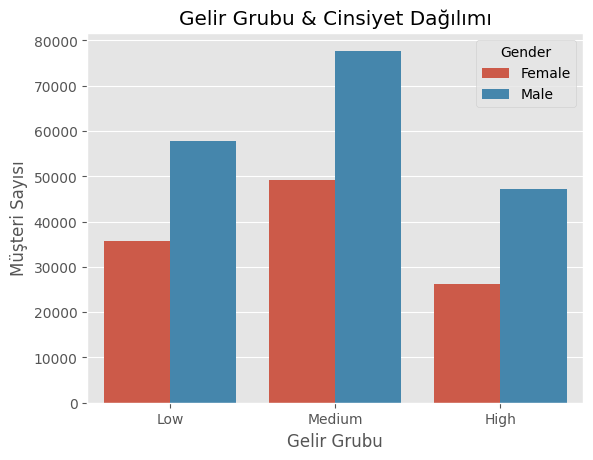

In [12]:
sns.countplot(data=df_clean, x="Income", hue="Gender", order=["Low", "Medium", "High"])
plt.title("Gelir Grubu & Cinsiyet Dağılımı")
plt.xlabel("Gelir Grubu")
plt.ylabel("Müşteri Sayısı")
plt.show()

## Ülkeye Göre Müşteri Dağılımı

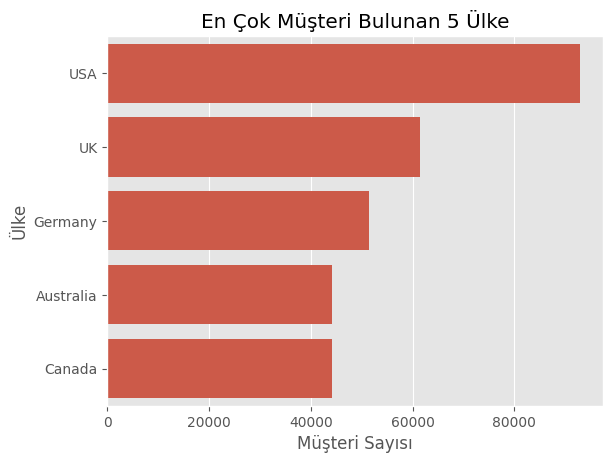

In [13]:
top_countries = df_clean['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("En Çok Müşteri Bulunan 5 Ülke")
plt.xlabel("Müşteri Sayısı")
plt.ylabel("Ülke")
plt.show()

## Yaş Dağılımı (Histogram)

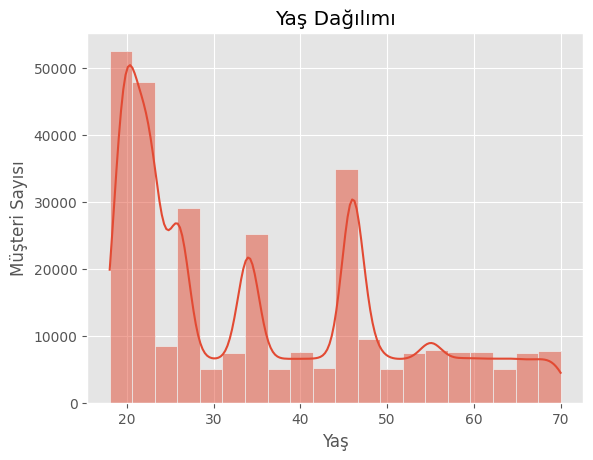

In [14]:
sns.histplot(df_clean['Age'], bins=20, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")
plt.show()

## Yaş & Gelir Grubu Ortalaması

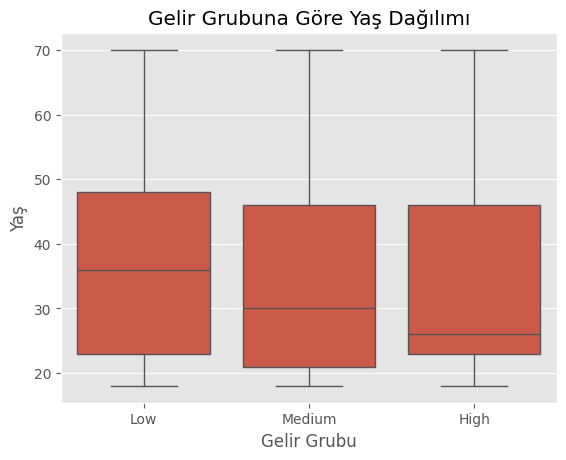

In [15]:
sns.boxplot(x="Income", y="Age", data=df_clean, order=["Low", "Medium", "High"])
plt.title("Gelir Grubuna Göre Yaş Dağılımı")
plt.xlabel("Gelir Grubu")
plt.ylabel("Yaş")
plt.show()

## Segmentlere Göre Ortalama Yaş ve Harcama

In [16]:
df_clean.groupby("Customer_Segment")[["Age", "Total_Amount"]].mean().round(2)

,Age,Total_Amount
Customer_Segment,,
New,35.83,1367.95
Premium,41.61,1363.84
Regular,32.54,1369.21


# Satın Alma Davranışları
Bu bölümde müşterilerin alışveriş yapma biçimleri incelenmiştir. Hangi müşteri segmentlerinin daha fazla harcama yaptığı ve hangi müşterilerin en sık alışveriş yaptığı analiz edilmiştir.

## En Çok Harcayan Müşteri Segmenti

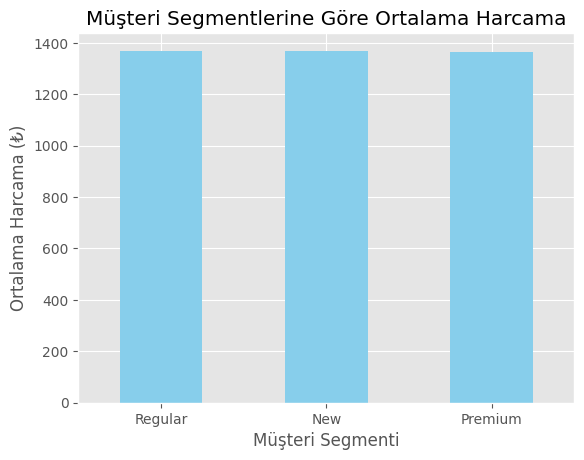

In [17]:
df_clean.groupby("Customer_Segment")["Total_Amount"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Müşteri Segmentlerine Göre Ortalama Harcama")
plt.ylabel("Ortalama Harcama (₺)")
plt.xlabel("Müşteri Segmenti")
plt.xticks(rotation=0)
plt.show()

## En Sık Alışveriş Yapan 10 Müşteri

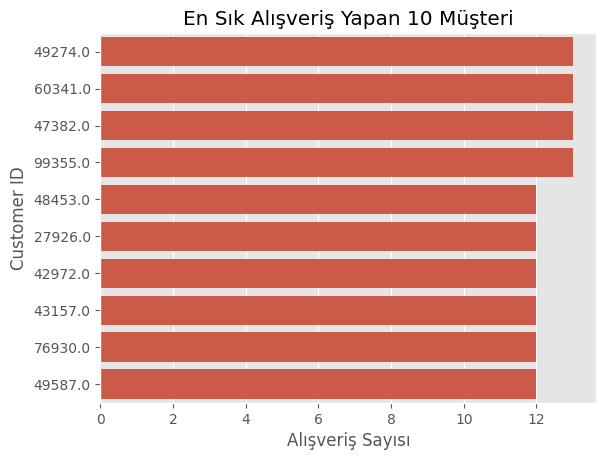

In [18]:
freq_df = df_clean.groupby("Customer_ID").size().reset_index(name="Transaction_Count")

top_freq = freq_df.sort_values(by="Transaction_Count", ascending=False).head(10)

sns.barplot(y=top_freq["Customer_ID"].astype(str), x=top_freq["Transaction_Count"])
plt.title("En Sık Alışveriş Yapan 10 Müşteri")
plt.xlabel("Alışveriş Sayısı")
plt.ylabel("Customer ID")
plt.show()

## En Fazla Ürün Satın Alan 10 Müşteri

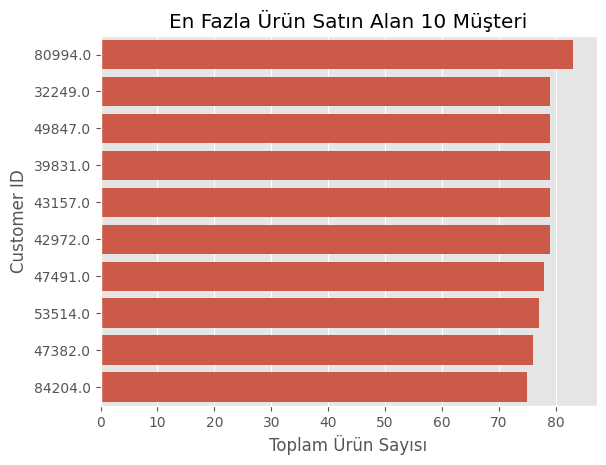

In [19]:
purchase_df = df_clean.groupby("Customer_ID")["Total_Purchases"].sum().reset_index()

top_purchase = purchase_df.sort_values(by="Total_Purchases", ascending=False).head(10)

sns.barplot(y=top_purchase["Customer_ID"].astype(str), x=top_purchase["Total_Purchases"])
plt.title("En Fazla Ürün Satın Alan 10 Müşteri")
plt.xlabel("Toplam Ürün Sayısı")
plt.ylabel("Customer ID")
plt.show()

## Ürün Kategorilerine Göre Toplam Harcama

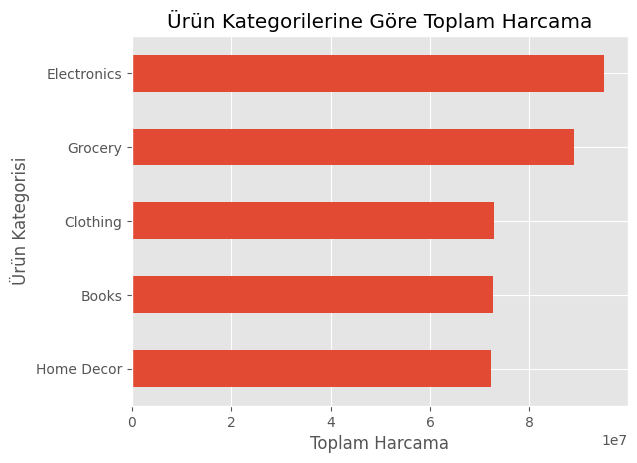

In [20]:
df_clean.groupby("Product_Category")["Total_Amount"].sum().sort_values().plot(kind="barh")
plt.title("Ürün Kategorilerine Göre Toplam Harcama")
plt.xlabel("Toplam Harcama")
plt.ylabel("Ürün Kategorisi")
plt.show()

## En Çok Tercih Edilen Ürün Türleri

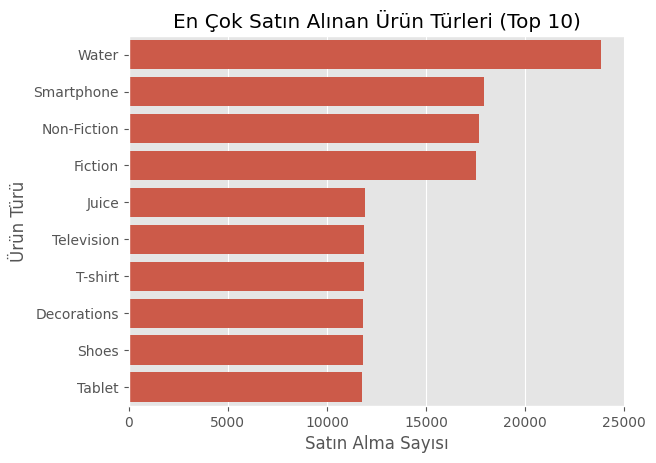

In [21]:
top_products = df_clean["Product_Type"].value_counts().nlargest(10)
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("En Çok Satın Alınan Ürün Türleri (Top 10)")
plt.xlabel("Satın Alma Sayısı")
plt.ylabel("Ürün Türü")
plt.show()

## En Çok Kullanılan Ödeme Yöntemleri

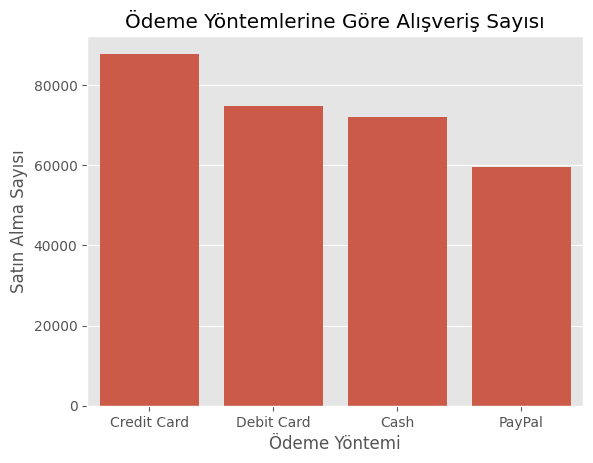

In [22]:
sns.countplot(data=df_clean, x="Payment_Method", order=df_clean["Payment_Method"].value_counts().index)
plt.title("Ödeme Yöntemlerine Göre Alışveriş Sayısı")
plt.xlabel("Ödeme Yöntemi")
plt.ylabel("Satın Alma Sayısı")
plt.show()

# Müşteri Memnuniyeti ve Geri Bildirim Analizi
Bu bölümde müşterilerin ürün ve hizmet deneyimlerine ilişkin geri bildirimleri analiz edilmiştir. Feedback ve Ratings sütunları kullanılarak genel memnuniyet düzeyi ve puan dağılımları görselleştirilmiştir.

## Geri Bildirim (Feedback) Dağılımı

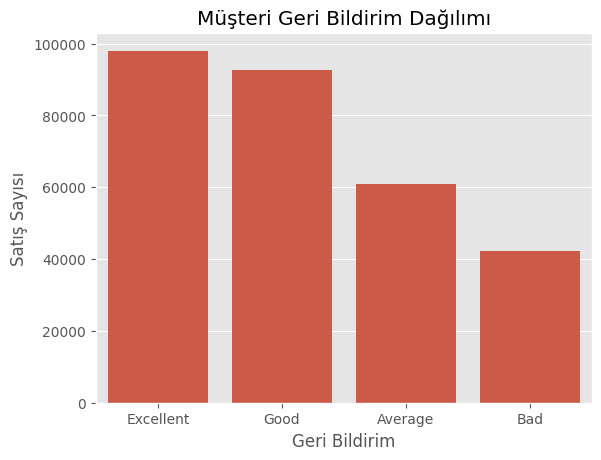

In [24]:
sns.countplot(data=df_clean, x="Feedback", order=df_clean["Feedback"].value_counts().index)
plt.title("Müşteri Geri Bildirim Dağılımı")
plt.xlabel("Geri Bildirim")
plt.ylabel("Satış Sayısı")
plt.show()

## Puanlara (Ratings) Göre Geri Bildirim Ortalaması

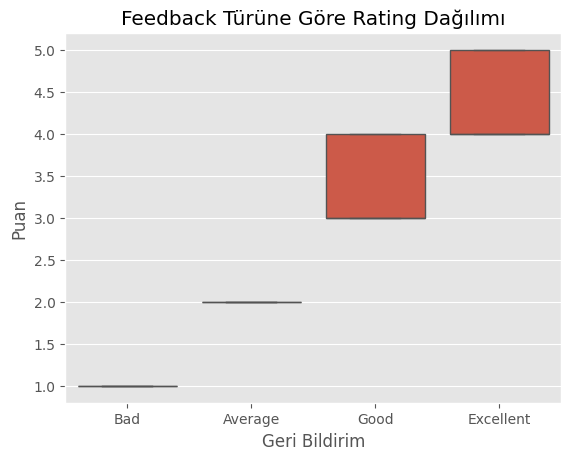

In [25]:
sns.boxplot(x="Feedback", y="Ratings", data=df_clean, order=["Bad", "Average", "Good", "Excellent"])
plt.title("Feedback Türüne Göre Rating Dağılımı")
plt.xlabel("Geri Bildirim")
plt.ylabel("Puan")
plt.show()

## Marka ve Memnuniyet İlişkisi (Top 5 Marka)

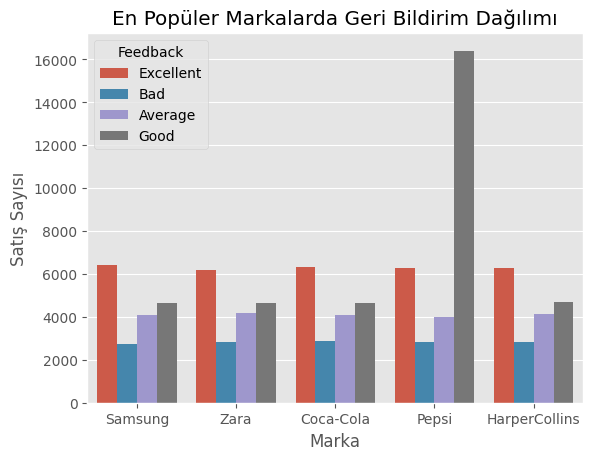

In [26]:
top_brands = df_clean["Product_Brand"].value_counts().nlargest(5).index
brand_feedback = df_clean[df_clean["Product_Brand"].isin(top_brands)]

sns.countplot(data=brand_feedback, x="Product_Brand", hue="Feedback")
plt.title("En Popüler Markalarda Geri Bildirim Dağılımı")
plt.xlabel("Marka")
plt.ylabel("Satış Sayısı")
plt.legend(title="Feedback")
plt.show()

## Ortalama Puanlara Göre En İyi 10 Ürün Türü

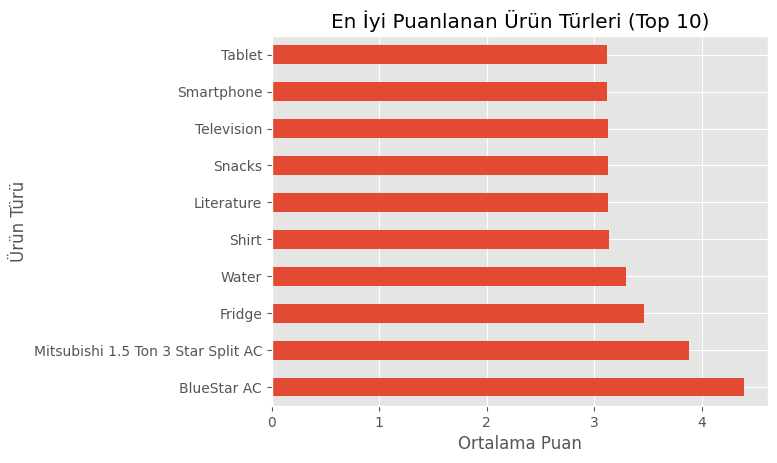

In [27]:
df_clean.groupby("Product_Type")["Ratings"].mean().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("En İyi Puanlanan Ürün Türleri (Top 10)")
plt.xlabel("Ortalama Puan")
plt.ylabel("Ürün Türü")
plt.show()

# Zaman Serisi ve Trend Analizi
Bu bölümde yıllara ve aylara göre toplam satış miktarları incelenmiş, zaman içerisindeki satış eğilimleri analiz edilmiştir. Amaç, mevsimsellik ve yıllık değişimleri ortaya koymaktır.

## Yıllara Göre Toplam Satış Miktarı

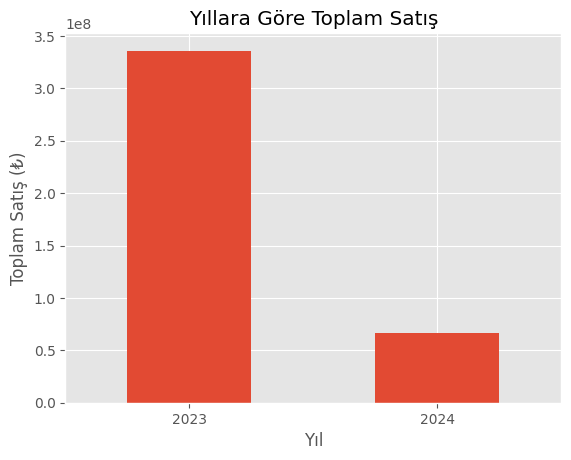

In [28]:
df_clean.groupby("Year")["Total_Amount"].sum().plot(kind="bar")
plt.title("Yıllara Göre Toplam Satış")
plt.xlabel("Yıl")
plt.ylabel("Toplam Satış (₺)")
plt.xticks(rotation=0)
plt.show()

## Aylara Göre Toplam Satış

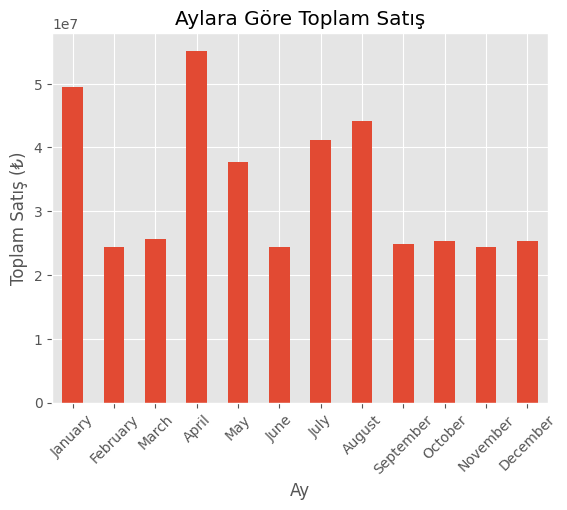

In [29]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_clean.groupby("Month")["Total_Amount"].sum().reindex(month_order).plot(kind="bar")
plt.title("Aylara Göre Toplam Satış")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış (₺)")
plt.xticks(rotation=45)
plt.show()

## Yıl & Ay Bazlı Isı Haritası (Heatmap)

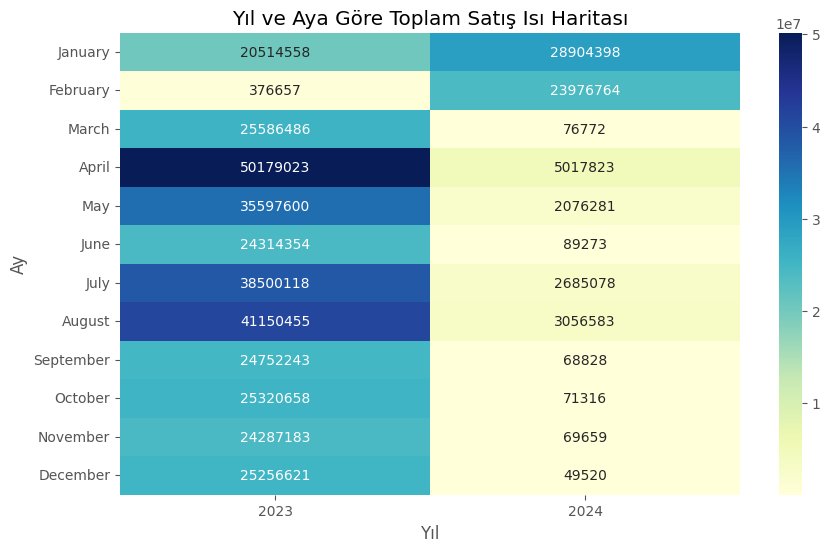

In [30]:
pivot = df_clean.pivot_table(values="Total_Amount", index="Month", columns="Year", aggfunc="sum")
pivot = pivot.reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Yıl ve Aya Göre Toplam Satış Isı Haritası")
plt.xlabel("Yıl")
plt.ylabel("Ay")
plt.show()

## Aylık Ortalama Satış Trendi (Tüm Yıllar Ortalaması)

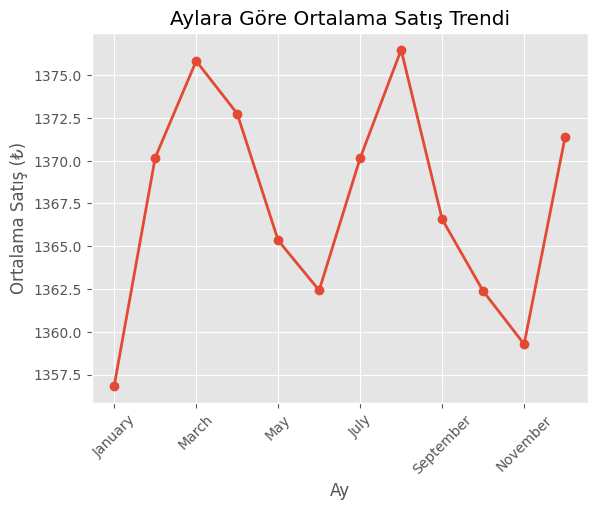

In [31]:
monthly_avg = df_clean.groupby("Month")["Total_Amount"].mean().reindex(month_order)

monthly_avg.plot(marker="o", linewidth=2)
plt.title("Aylara Göre Ortalama Satış Trendi")
plt.xlabel("Ay")
plt.ylabel("Ortalama Satış (₺)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Kargo Yöntemi ve Sipariş Durumu Analizi
Bu bölümde siparişlerin durumları (Order_Status) ve her bir durumun ortalama harcama değerleri incelenmiştir. Hangi tür siparişlerin daha yaygın olduğu ve ne kadar harcama ile sonuçlandığı analiz edilmiştir.

## Sipariş Durumu Dağılımı (Order_Status)

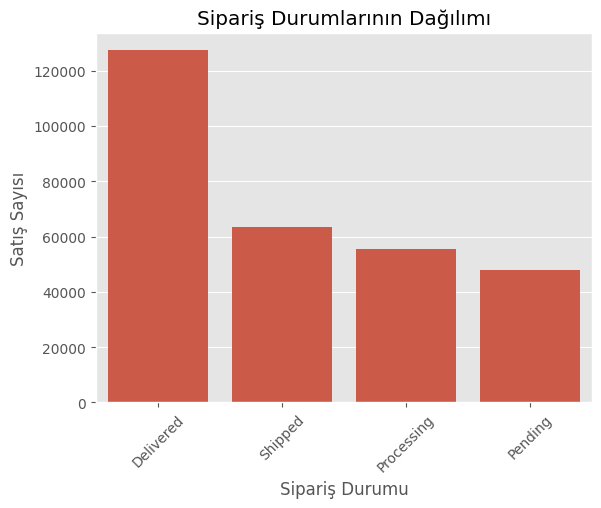

In [32]:
sns.countplot(data=df_clean, x="Order_Status", order=df_clean["Order_Status"].value_counts().index)
plt.title("Sipariş Durumlarının Dağılımı")
plt.xlabel("Sipariş Durumu")
plt.ylabel("Satış Sayısı")
plt.xticks(rotation=45)
plt.show()

## Sipariş Durumuna Göre Ortalama Harcama


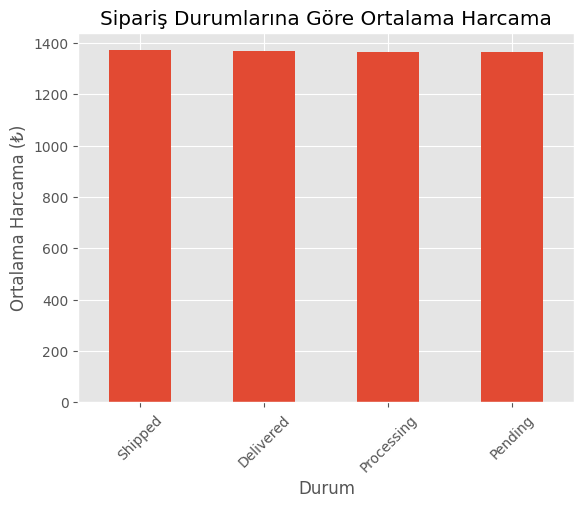

In [33]:
df_clean.groupby("Order_Status")["Total_Amount"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Sipariş Durumlarına Göre Ortalama Harcama")
plt.xlabel("Durum")
plt.ylabel("Ortalama Harcama (₺)")
plt.xticks(rotation=45)
plt.show()

## Kargo Yöntemi & Sipariş Durumu İlişkisi

In [34]:
pd.crosstab(df_clean["Shipping_Method"], df_clean["Order_Status"], normalize='index').round(2).style.background_gradient(cmap="YlGnBu")

Order_Status,Delivered,Pending,Processing,Shipped
Shipping_Method,,,,
Express,0.430000,0.160000,0.190000,0.210000
Same-Day,0.440000,0.160000,0.190000,0.210000
Standard,0.420000,0.170000,0.190000,0.220000


## "Pending” Oranı En Yüksek Kargo Yöntemleri

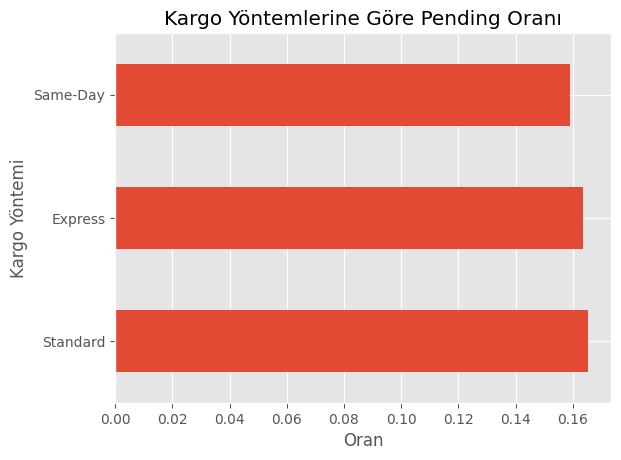

In [36]:
pending_rates = pd.crosstab(df_clean["Shipping_Method"], df_clean["Order_Status"], normalize='index')
pending_rates["Pending"].sort_values(ascending=False).plot(kind="barh")
plt.title("Kargo Yöntemlerine Göre Pending Oranı")
plt.xlabel("Oran")
plt.ylabel("Kargo Yöntemi")
plt.show()

## “Delivered” ve “Shipped” Oranları Zamanla Değişiyor mu?

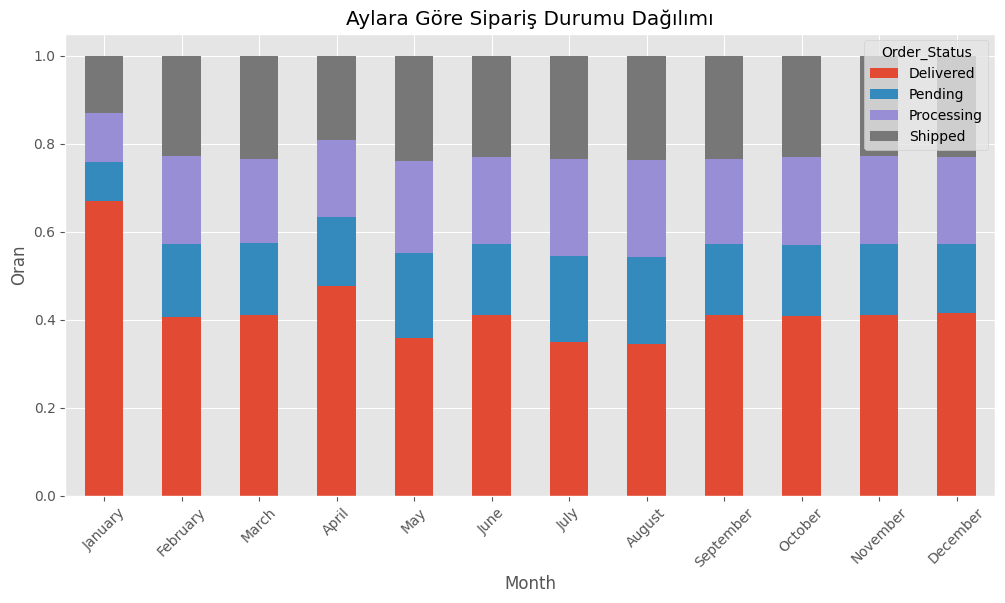

In [37]:
status_by_month = pd.crosstab(df_clean["Month"], df_clean["Order_Status"], normalize="index")
status_by_month.loc[["January", "February", "March", "April", "May", "June",
                     "July", "August", "September", "October", "November", "December"]
                   ].plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Aylara Göre Sipariş Durumu Dağılımı")
plt.ylabel("Oran")
plt.xticks(rotation=45)
plt.show()